In [171]:
import cdflib

import numpy as np
from  datetime import datetime

from viresclient import set_token
from viresclient import SwarmRequest
set_token(
        "https://vires.services/ows",
        set_default=True,
        token="kmxv5mTTyYwzw4kQ9lsCkGfQHtjjJRVZ",
    )  # key


Token saved for https://vires.services/ows


In [241]:
# Replace 'your_file.cdf' with the path to your CDF file
cdf_file_path = 'tracisfolder\SW_OPER_EFIATISH1B_20210924T000000_20210924T235959_0201.cdf'

In [242]:
# Open the CDF file
cdf_data = cdflib.CDF(cdf_file_path)
given_datetime_1_long = datetime(2021, 9, 24, 3, 30, 0)
given_datetime_2_long = datetime(2021, 9, 24, 4, 0, 0)
given_datetime_1_short = datetime(2021, 9, 24, 3, 46, 0)
given_datetime_2_short = datetime(2021, 9, 24, 3, 47, 30)

In [243]:

cdf_info = cdf_data.cdf_info()
print(cdf_info)

CDFInfo(CDF=WindowsPath('C:/Users/1101w/Documents/Programming/Physics_Work/tracisfolder/SW_OPER_EFIATISH1B_20210924T000000_20210924T235959_0201.cdf'), Version='3.8.1', Encoding=6, Majority='Row_major', rVariables=[], zVariables=['Timestamp', 'Latitude', 'Longitude', 'Radius', 'TII_imaging_mode', 'V_MCP_Setting_H', 'V_MCP_Setting_V', 'V_Phos_Setting_H', 'V_Phos_Setting_V', 'V_Bias_Setting_H', 'V_Bias_Setting_V', 'Column_sum_spectrum_H', 'Column_sum_spectrum_V', 'Column_sum_energies_H', 'Column_sum_energies_V'], Attributes=[{'Project': 'Global'}, {'Mission_group': 'Global'}, {'TITLE': 'Global'}, {'PI_name': 'Global'}, {'PI_affiliation': 'Global'}, {'Acknowledgement': 'Global'}, {'Software_version': 'Global'}, {'MODS': 'Global'}, {'File_Name': 'Global'}, {'List_Of_Input_Files': 'Global'}, {'Logical_source_description': 'Global'}, {'Source_name': 'Global'}, {'Data_type': 'Global'}, {'Data_version': 'Global'}, {'Descriptor': 'Global'}, {'Discipline': 'Global'}, {'Generated_by': 'Global'}, {

In [244]:

timestamp_data = cdf_data.varget('Timestamp')
readable_date = cdflib.cdfepoch.to_datetime(timestamp_data)
Spec_H = cdf_data.varget('Column_sum_spectrum_H')
Erg_V = cdf_data.varget('Column_sum_energies_V')
Erg_H = cdf_data.varget('Column_sum_energies_H')
Spec_V = cdf_data.varget('Column_sum_spectrum_V')

In [245]:
readable_date

array(['2021-09-24T00:00:00.000000', '2021-09-24T00:00:00.500000',
       '2021-09-24T00:00:01.000000', ..., '2021-09-24T23:59:59.000000',
       '2021-09-24T23:59:59.500000', '2021-09-25T00:00:00.000000'],
      dtype='datetime64[us]')

In [246]:
print(np.shape(Spec_H))

(172777, 32)


In [247]:
import matplotlib.pyplot as plt

In [248]:
# Given Python datetime objects (replace with actual values)
readable_dates = [dt if isinstance(dt, datetime) else dt.astype(datetime) for dt in readable_date]

# Function to find the closest index
def find_closest_index(datetime_list, target_datetime):
    time_deltas = np.abs(np.array([(dt - target_datetime).total_seconds() for dt in datetime_list]))
    return np.argmin(time_deltas)

# Find the closest indices
closest_index_1 = find_closest_index(readable_dates, given_datetime_1_long)
closest_index_2 = find_closest_index(readable_dates, given_datetime_2_long)

start_index = min(closest_index_1, closest_index_2)
end_index = max(closest_index_1, closest_index_2)
indices_range = np.arange(start_index, end_index + 1)
print(indices_range)

[25194 25195 25196 ... 28792 28793 28794]


In [249]:
readable_dates = np.array(readable_dates)[indices_range]

(3601,) (172777, 32) (3601, 32)


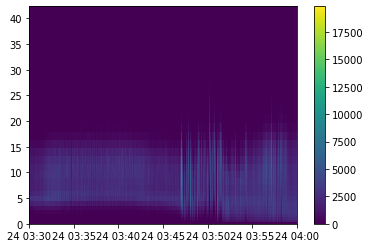

In [250]:
print(np.shape(readable_dates), np.shape(Erg_V), np.shape(Spec_H[indices_range]))
plt.pcolormesh(readable_dates, Erg_V[start_index, :], Spec_V[indices_range].T)
plt.colorbar()

(3601,) (172777, 32) (3601, 32)


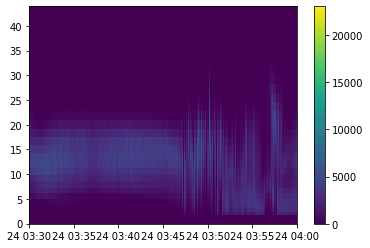

In [251]:
print(np.shape(readable_dates), np.shape(Erg_V), np.shape(Spec_H[indices_range]))
plt.pcolormesh(readable_dates, Erg_H[start_index, :], Spec_H[indices_range].T)
plt.colorbar()

Text(0.5, 1.0, 'Vertical EFI average counts per time')

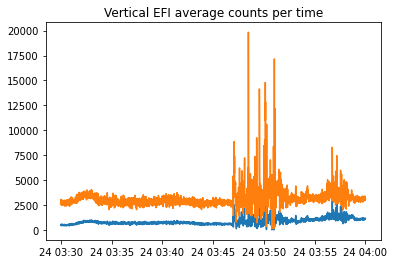

In [288]:
plt.plot(readable_dates, np.mean(Spec_V[indices_range].T, axis=0))
plt.plot(readable_dates, np.max(Spec_V[indices_range].T, axis=0))
plt.title("Vertical EFI average counts per time")

Text(0.5, 1.0, 'Horizontal EFI average counts per time')

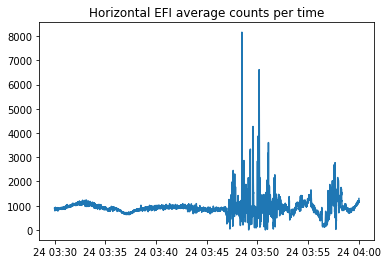

In [289]:
plt.plot(readable_dates, np.mean(Spec_H[indices_range].T, axis=0))
plt.title("Horizontal EFI average counts per time")

In [290]:
tct_vars = [
    # Satellite velocity in NEC frame
    "VsatC", "VsatE", "VsatN",
    # Geomagnetic field components derived from 1Hz product
    #  (in satellite-track coordinates)
    "Bx", "By", "Bz",
    # Electric field components derived from -VxB with along-track ion drift
    #  (in satellite-track coordinates)
    # Eh: derived from horizontal sensor
    # Ev: derived from vertical sensor
    "Ehx", "Ehy", "Ehz",
    "Evx", "Evy", "Evz",
    # Ion drift corotation signal, removed from ion drift & electric field
    #  (in satellite-track coordinates)
    "Vicrx", "Vicry", "Vicrz",
    # Ion drifts along-track from vertical (..v) and horizontal (..h) TII sensor
    "Vixv", "Vixh",
    # Ion drifts cross-track (y from horizontal sensor, z from vertical sensor)
    #  (in satellite-track coordinates)
    "Viy", "Viz",
    # Random error estimates for the above
    #  (Negative value indicates no estimate available)
    "Vixv_error", "Vixh_error", "Viy_error", "Viz_error",
    # Quasi-dipole magnetic latitude and local time
    #  redundant with VirES auxiliaries, QDLat & MLT
    "Latitude_QD", "MLT_QD",
    # Refer to release notes link above for details:
    "Calibration_flags", "Quality_flags",
]

In [291]:
given_datetime_1 = datetime(2021, 9, 24, 3, 46, 0)
given_datetime_2 = datetime(2021, 9, 24, 3, 48, 0)

SERVER_URL = 'https://vires.services/ows'
request = SwarmRequest(SERVER_URL)
request.set_collection("SW_EXPT_EFIA_TCT16")
request.set_products(measurements=tct_vars)
data = request.get_between(given_datetime_1_short, given_datetime_2_short)
df_A = data.as_dataframe()


Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.296MB)


In [292]:
given_datetime_1 = datetime(2021, 9, 24, 3, 46, 0)
given_datetime_2 = datetime(2021, 9, 24, 3, 48, 0)

SERVER_URL = 'https://vires.services/ows'
request = SwarmRequest(SERVER_URL)
request.set_collection("SW_EXPT_EFIC_TCT16")
request.set_products(measurements=tct_vars)
data = request.get_between(given_datetime_1_short, given_datetime_2_short)
df_C = data.as_dataframe()

Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.296MB)


In [293]:
print(df_C)

                                Viz_error            Bx       Ehz  Longitude  \
Timestamp                                                                      
2021-09-24 03:46:00.006750208  155.837097  11015.562500  1.320499 -94.398911   
2021-09-24 03:46:00.068749824  155.837097  11013.794922  1.588025 -94.398674   
2021-09-24 03:46:00.131750144  155.837097  11011.999023  1.617510 -94.398422   
2021-09-24 03:46:00.193750016  155.837097  11010.229492  1.416810 -94.398186   
2021-09-24 03:46:00.256750080  155.837097  11008.432617  1.480756 -94.397934   
...                                   ...           ...       ...        ...   
2021-09-24 03:47:29.693750016  155.837097   8425.205078  1.021698 -93.936302   
2021-09-24 03:47:29.756750080  155.837097   8423.234375  0.603045 -93.935883   
2021-09-24 03:47:29.818749952  155.837097   8421.296875  1.532251 -93.935471   
2021-09-24 03:47:29.881750016  155.837097   8419.325195  1.359604 -93.935051   
2021-09-24 03:47:29.943749888  155.83709

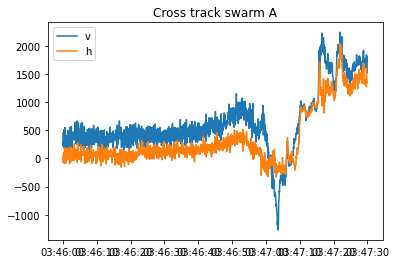

In [294]:
plt.plot(df_A["Vixv"], label='v')
plt.plot(df_A["Vixh"], label='h')
plt.title("Cross track swarm A")
plt.legend()

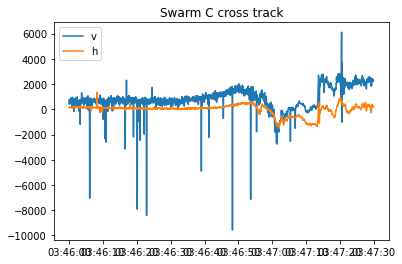

In [295]:
plt.plot(df_C["Vixv"], label='v')
plt.plot(df_C["Vixh"], label='h')
plt.title("Swarm C cross track") #With filtering should be fine
plt.legend()

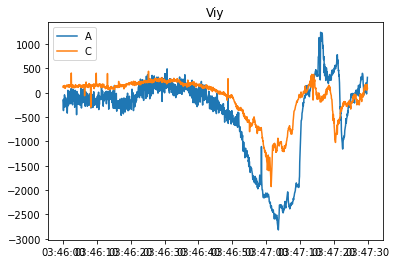

In [296]:
plt.plot(df_A["Viy"], label='A')
plt.plot(df_C["Viy"], label='C')
plt.title("Viy")
plt.legend()

E_x = -( Vi cross B )_x = -(Vi_y B_z - Vi_z B_y) 

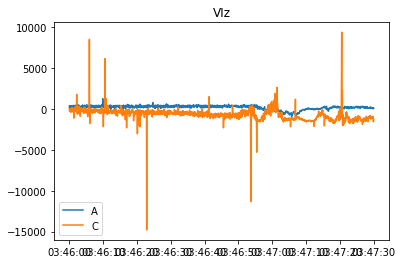

In [297]:
plt.plot(df_A["Viz"], label='A')
plt.plot(df_C["Viz"], label='C')
plt.title("VIz")
plt.legend()

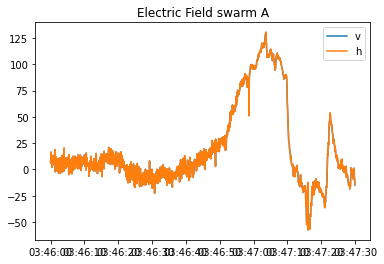

In [298]:
plt.plot(df_A["Ehx"], label='v')
plt.plot(df_A["Evx"], label='h')
plt.title("Electric Field swarm A")
plt.legend()

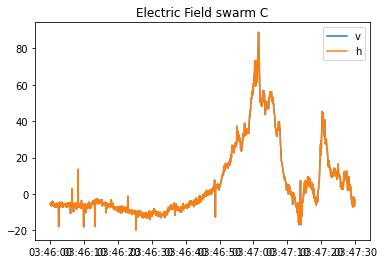

In [299]:
plt.plot(df_C["Ehx"], label='v')
plt.plot(df_C["Evx"], label='h')
plt.title("Electric Field swarm C")
plt.legend()

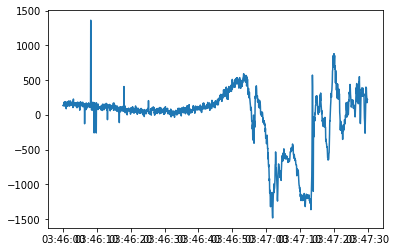

In [300]:
plt.plot(df_C["Vixh"], label='h')

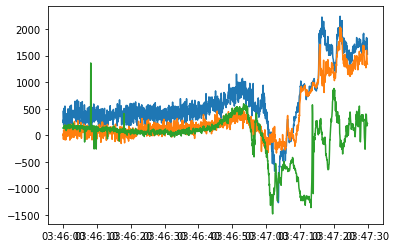

In [301]:
plt.plot(df_A["Vixv"])
plt.plot(df_A["Vixh"])
plt.plot(df_C["Vixh"])

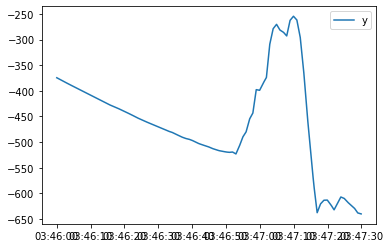

In [302]:
#plt.plot(df_A["Bx"], label='x')
plt.plot(df_A["By"], label='y')
#plt.plot(df_A["Bz"], label='z')
plt.legend()

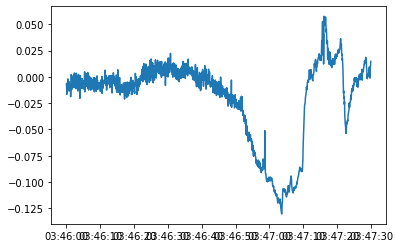

In [303]:
plt.plot(df_A["Bz"]*1e-9 * df_A["Viy"])

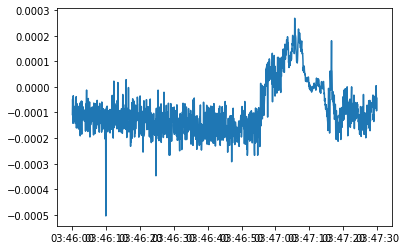

In [304]:
plt.plot(df_A["By"]*1e-9 * df_A["Viz"])

In [305]:
NEC_vecs=np.array(df_A[["VsatN", "VsatE", "VsatC"]])
arraysum = np.sum(np.abs(NEC_vecs), axis=1)
# Normalizes and finds unitary
array_unit = NEC_vecs / arraysum[:, np.newaxis]  # normalizes
print(array_unit[0])

[ 0.9634406   0.03488072 -0.00167874]
